In [1]:
# import agent
# import environment
# import runner
#import graph
#import bus_line
import numpy as np
import networkx as nx
import sys
import random
import pylab 
import matplotlib.pyplot as plt
import math

In [2]:
location_route_1 = [[19.050593, 47.496737],
 [19.054142, 47.497728],
 [19.055655, 47.499937],
 [19.059161, 47.502305],
 [19.063233, 47.505023],
 [19.066529, 47.507238],
 [19.069544, 47.509261],
 [19.072662, 47.511342],
 [19.076883, 47.51411],
 [19.081481, 47.517407],
 [19.091037, 47.519513]]

In [3]:
time_1 = list(np.array([1,2,1,1,1,1,1,1,2,2])/60)

In [4]:
location_route_2 = [[19.024604, 47.50045],
 [19.026097, 47.507533],
 [19.038103, 47.506826],
 [19.045769, 47.505511],
 [19.053857, 47.497593],
 [19.062457, 47.494825],
 [19.070274, 47.497006],
 [19.082881, 47.499683],
 [19.106381, 47.500174],
 [19.120417, 47.501204],
 [19.135963, 47.502922]]

In [5]:
time_2 = list(np.array([2,2,2,2,2,2,2,2,2,2])/60)

In [6]:
location_route_3 = [[19.08976, 47.560437],
 [19.079567, 47.559146],
 [19.073019, 47.548374],
 [19.069055, 47.538163],
 [19.066471, 47.532171],
 [19.063088, 47.524358],
 [19.060285, 47.517595],
 [19.055952, 47.510828],
 [19.054513, 47.50367],
 [19.054525, 47.497591],
 [19.056789, 47.49182],
 [19.06192, 47.48949],
 [19.072242, 47.484862],
 [19.078425, 47.482872],
 [19.091071, 47.478365],
 [19.100672, 47.474913],
 [19.111646, 47.470529],
 [19.118838, 47.467939],
 [19.126228, 47.465749],
 [19.148764, 47.463443]]

In [7]:
time_3 = list(np.array([2,2,2,2,2,2,2,2,2,12,1,2,1,2,2,2,1,1,2])/60)

In [8]:
location_route_4 = [[19.020587, 47.464255],
 [19.033386, 47.465022],
 [19.046266, 47.473559],
 [19.047645, 47.47731],
 [19.055036, 47.483039],
 [19.058009, 47.486169],
 [19.061938, 47.489245],
 [19.072489, 47.49276],
 [19.077707, 47.496078],
 [19.081704, 47.500485]]

In [9]:
time_4 = list(np.array([2,2,1,2,1,1,2,1,1])/60)

In [10]:
#len(location_route_1)
#len(location_route_2)
#len(location_route_4)
#len(location_route_5)

In [11]:
all_edge = [(i,i+1) for i in range(51) if i!= 10 and i!= 21 and i!= 41]

In [12]:
all_pos = location_route_1+location_route_2+location_route_3+location_route_4

In [13]:
#len(all_pos)

In [14]:
np.mean(all_pos,axis=0)

array([19.07106385, 47.49970317])

In [15]:
np.min(all_pos,axis=0)

array([19.020587, 47.463443])

In [16]:
np.max(all_pos,axis=0)

array([19.148764, 47.560437])

In [17]:
new_all_pos = (all_pos-np.mean(all_pos,axis=0)) * 110 # km

In [18]:
#new_all_pos[:,0] = -new_all_pos[:,0]

In [19]:
#new_all_pos = new_all_pos.dot(np.array([[0,-1],[1,0]]))

In [20]:
np.min(new_all_pos,axis=0)

array([-5.55245308, -3.98861904])

In [21]:
# 25 km x 25 km + (10,15)
new_all_pos = new_all_pos + np.array( [6,4] )

In [22]:
np.max(new_all_pos,axis=0)

array([14.54701692, 10.68072096])

In [23]:
np.min(new_all_pos,axis=0)

array([0.44754692, 0.01138096])

In [24]:
route_1 = new_all_pos[:11]

In [25]:
route_1

array([[3.74820692, 3.67372096],
       [4.13859692, 3.78273096],
       [4.30502692, 4.02572096],
       [4.69068692, 4.28620096],
       [5.13860692, 4.58518096],
       [5.50116692, 4.82883096],
       [5.83281692, 5.05136096],
       [6.17579692, 5.28027096],
       [6.64010692, 5.58475096],
       [7.14588692, 5.94742096],
       [8.19704692, 6.17908096]])

In [26]:
route_2 = new_all_pos[11:22]

In [39]:
route_2

array([[ 0.88941692,  4.08215096],
       [ 1.05364692,  4.86128096],
       [ 2.37430692,  4.78351096],
       [ 3.21756692,  4.63886096],
       [ 4.10724692,  3.76788096],
       [ 5.05324692,  3.46340096],
       [ 5.91311692,  3.70331096],
       [ 7.29988692,  3.99778096],
       [ 9.88488692,  4.05179096],
       [11.42884692,  4.16509096],
       [13.13890692,  4.35407096]])

In [27]:
route_3 = new_all_pos[22:42]

In [40]:
route_3

array([[8.05657692e+00, 1.06807210e+01],
       [6.93534692e+00, 1.05387110e+01],
       [6.21506692e+00, 9.35379096e+00],
       [5.77902692e+00, 8.23058096e+00],
       [5.49478692e+00, 7.57146096e+00],
       [5.12265692e+00, 6.71203096e+00],
       [4.81432692e+00, 5.96810096e+00],
       [4.33769692e+00, 5.22373096e+00],
       [4.17940692e+00, 4.43635096e+00],
       [4.18072692e+00, 3.76766096e+00],
       [4.42976692e+00, 3.13285096e+00],
       [4.99417692e+00, 2.87655096e+00],
       [6.12959692e+00, 2.36747096e+00],
       [6.80972692e+00, 2.14857096e+00],
       [8.20078692e+00, 1.65280096e+00],
       [9.25689692e+00, 1.27308096e+00],
       [1.04640369e+01, 7.90840962e-01],
       [1.12551569e+01, 5.05940962e-01],
       [1.20680569e+01, 2.65040962e-01],
       [1.45470169e+01, 1.13809615e-02]])

In [28]:
route_4 = new_all_pos[42:]

In [41]:
route_4

array([[0.44754692, 0.10070096],
       [1.85543692, 0.18507096],
       [3.27223692, 1.12414096],
       [3.42392692, 1.53675096],
       [4.23693692, 2.16694096],
       [4.56396692, 2.51124096],
       [4.99615692, 2.84960096],
       [6.15676692, 3.23625096],
       [6.73074692, 3.60123096],
       [7.17041692, 4.08600096]])

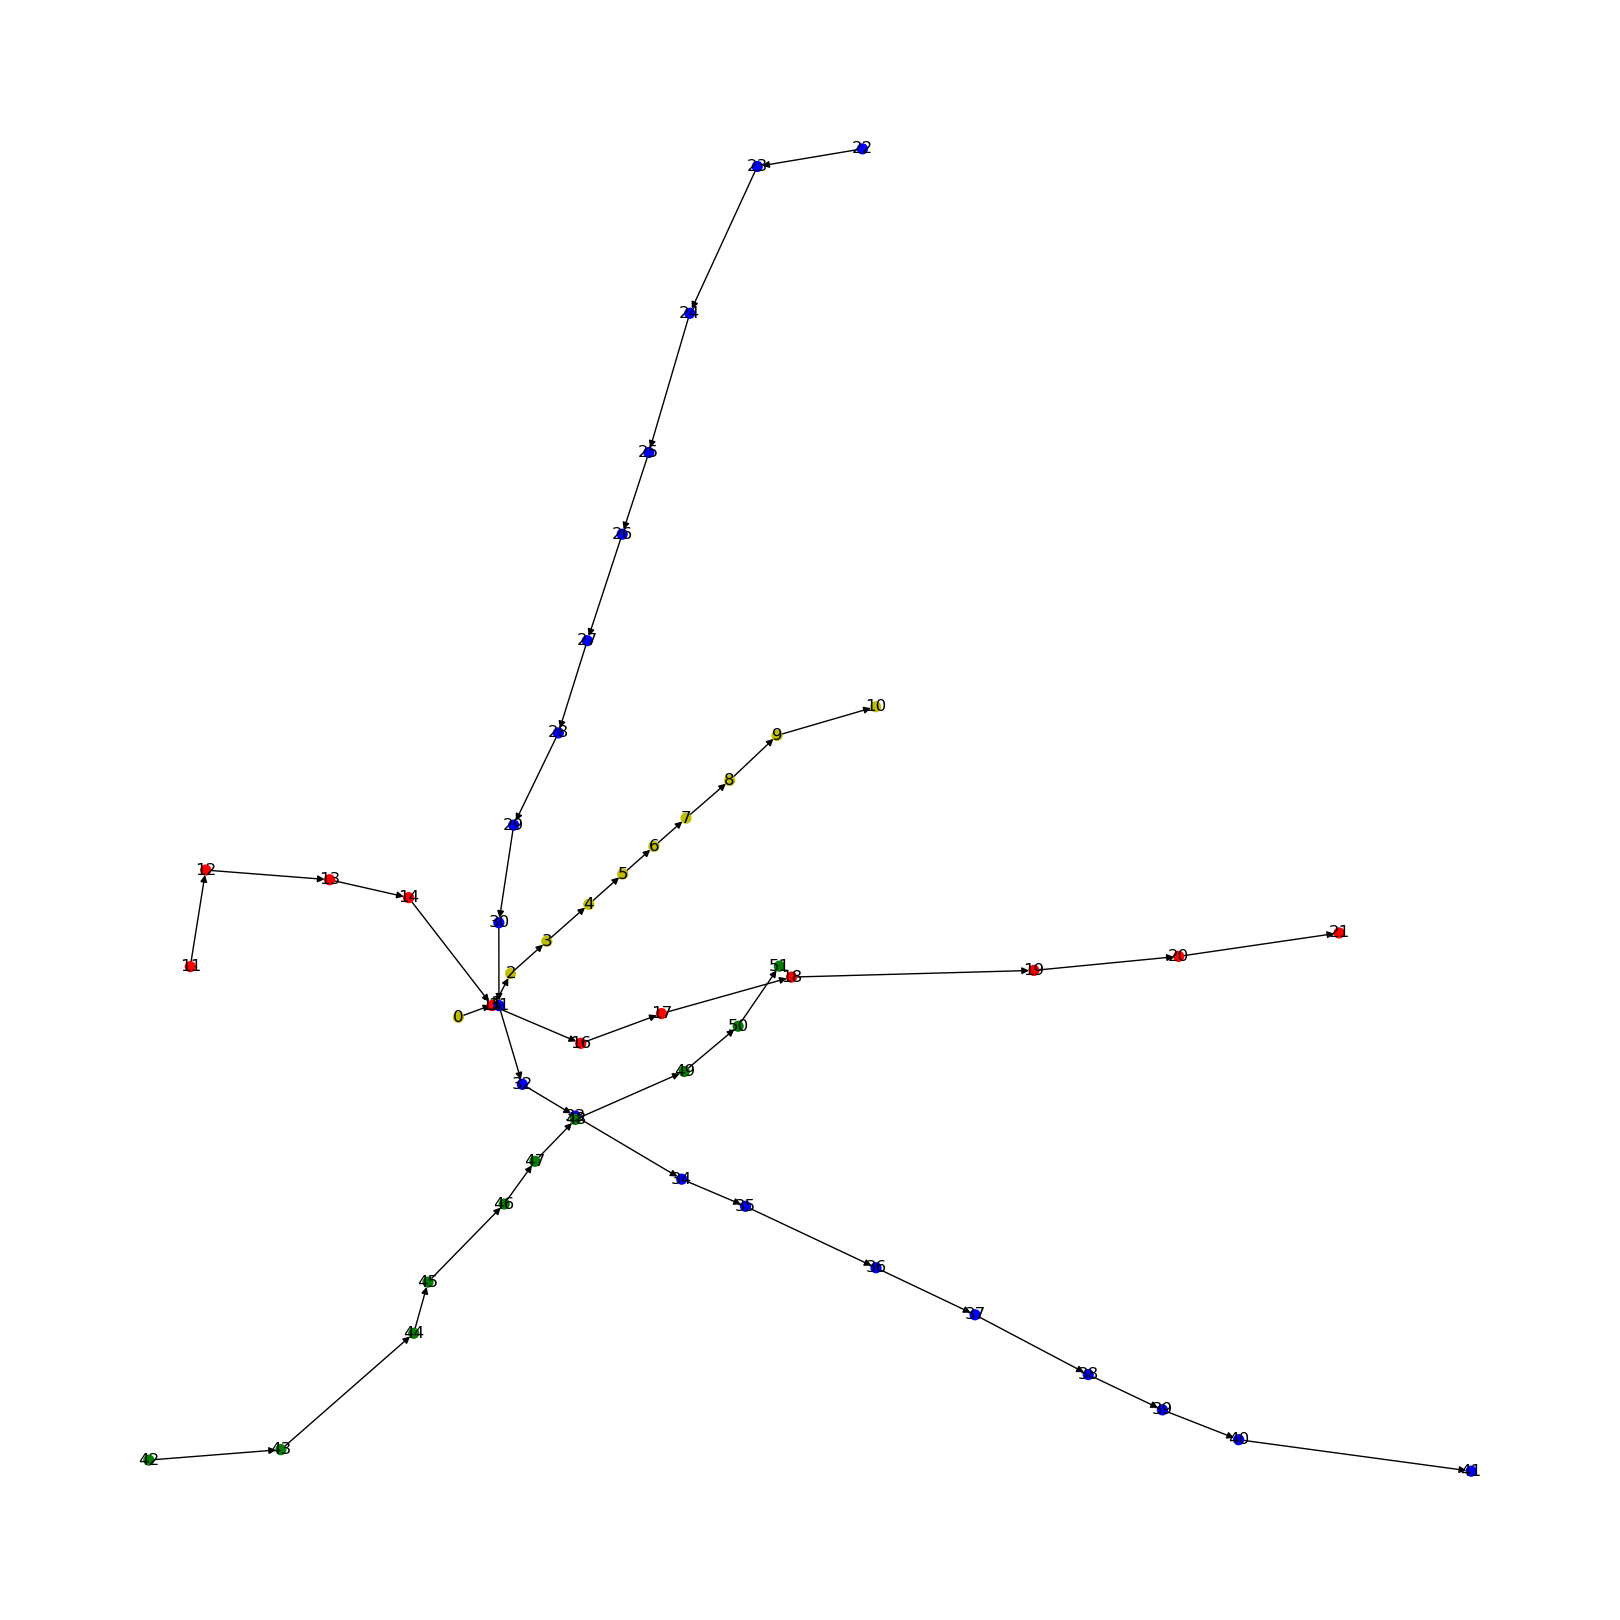

In [29]:
g = nx.DiGraph()

g.add_nodes_from([i for i in range(52)])

g.add_edges_from(all_edge)

node_color=["y" for i in range(11)]+["r" for i in range(11)]+["blue" for i in range(20)]+["g" for i in range(10)]
node_size=[50 for i in range(52)]

fig=plt.figure(figsize=(16,16))
nx.draw(g, new_all_pos, with_labels=True,node_color=node_color, node_size = node_size)
plt.show()

In [30]:
new_all_pos

array([[3.74820692e+00, 3.67372096e+00],
       [4.13859692e+00, 3.78273096e+00],
       [4.30502692e+00, 4.02572096e+00],
       [4.69068692e+00, 4.28620096e+00],
       [5.13860692e+00, 4.58518096e+00],
       [5.50116692e+00, 4.82883096e+00],
       [5.83281692e+00, 5.05136096e+00],
       [6.17579692e+00, 5.28027096e+00],
       [6.64010692e+00, 5.58475096e+00],
       [7.14588692e+00, 5.94742096e+00],
       [8.19704692e+00, 6.17908096e+00],
       [8.89416923e-01, 4.08215096e+00],
       [1.05364692e+00, 4.86128096e+00],
       [2.37430692e+00, 4.78351096e+00],
       [3.21756692e+00, 4.63886096e+00],
       [4.10724692e+00, 3.76788096e+00],
       [5.05324692e+00, 3.46340096e+00],
       [5.91311692e+00, 3.70331096e+00],
       [7.29988692e+00, 3.99778096e+00],
       [9.88488692e+00, 4.05179096e+00],
       [1.14288469e+01, 4.16509096e+00],
       [1.31389069e+01, 4.35407096e+00],
       [8.05657692e+00, 1.06807210e+01],
       [6.93534692e+00, 1.05387110e+01],
       [6.215066

In [31]:
np.max(new_all_pos,axis=0)

array([14.54701692, 10.68072096])

In [32]:
12*16

192

In [33]:
old_centroid_node = [ i+80 for i in range(0,12*16) ]
old_centroid_pos = np.reshape([[ (i,j) for j in range(12) ] for i in range(16)],(12*16,2))

In [34]:
old_centroid_pos

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 0,  9],
       [ 0, 10],
       [ 0, 11],
       [ 1,  0],
       [ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 2,  0],
       [ 2,  1],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 2, 11],
       [ 3,  0],
       [ 3,  1],
       [ 3,  2],
       [ 3,  3],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 3, 11],
       [ 4,  0],
       [ 4,  1],
       [ 4,  2],
       [ 4,  3],
       [ 4,  4],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9],
       [ 4, 10

In [35]:
old_centroid_pos[0]

array([0, 0])

In [36]:
old_centroid_pos[1]

array([0, 1])

In [37]:
old_centroid_pos[12]

array([1, 0])

In [38]:
old_centroid_pos[13]

array([1, 1])